## El primer paso es cargar la imagen para poder analizarla

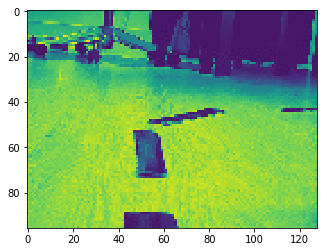

In [2]:
from scipy import ndimage
import matplotlib.pyplot as plt
%matplotlib inline
im = ndimage.imread('0004.jpg', mode='L')
plt.imshow(im)

## De la imagen hay partes que no necesitamos para nada 
la mesa camilla es bonita pero sobra, así que la recortamos usando numpy. Además bajamos la resolución para reducir el número de pixels



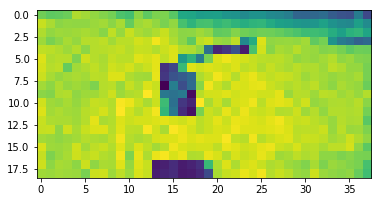

In [5]:
im_cropped = ndimage.zoom(im[im.shape[0]//3:,:], 0.3)
plt.imshow(im_cropped)

## Con este burruño tenemos que sacar unas lineas, podríamos usar opencv, deep learning, pero antes, echemos un ojo al histograma no siendo que solo necesitemos pensar


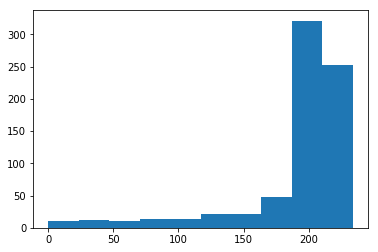

In [8]:
hist = plt.hist(im_cropped.flatten(), bins=10)

## está claro que tenemos por una parte el fondo y luego otros colores. Esos colores parecen los interesantes, saquemos de ahí lo que necesitamos
probemos un cortecito por la mitad


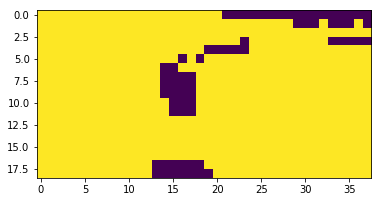

In [9]:
import numpy as np
im_cropped[im_cropped < 128] = 0
im_cropped[im_cropped >= 128] = 255
plt.imshow(im_cropped)

## Podríamos sacar una línea. Sí, clarmente podríamos si pasamos un poco de los pixels de arriba
Pero eso lo hacemos en el siguiente paso.

Si vamos bien de tiempo aquí (debería haber pasado aproximadamente 1 hora y 15 minutos) podríamos pensar si esto funciona para una imagen más real

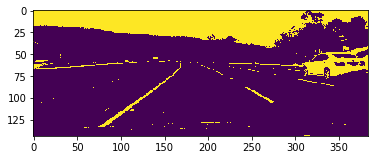

In [10]:
im = ndimage.imread('real.jpg', mode='L')
plt.imshow(im)
im_cropped = ndimage.zoom(im[im.shape[0]//3:,:], 0.3)
im_cropped[im_cropped < 128] = 0
im_cropped[im_cropped >= 128] = 255
dummy = plt.imshow(im_cropped)

## va a resultar que parece que funciona, hay que recorar un poco más el cielo.
La pega está clara, cómo sabemos qué color es "fondo" y cual no lo es? Por el número de pixels, claro!


NON-black pixels vs total: 2269 33024


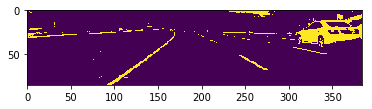

In [11]:
im = ndimage.imread('real.jpg', mode='L')
im_cropped = ndimage.zoom(im[im.shape[0]//2:-im.shape[0]//10,:], 0.3)
im_cropped[im_cropped < 128] = 0
im_cropped[im_cropped >= 128] = 255
plt.imshow(im_cropped)
print("NON-black pixels vs total: %d %d" % (np.count_nonzero(im_cropped), im_cropped.size))

# VALE PERO COMO SACAMOS LAS LÍNEAS, J-E-T-A
Siguiente episodio